In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
backpain = pd.read_csv("backpain10.csv")

backpain.head(10) #several missing values!

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0.198920,13.8514,10.7146,11.37832,-20.510434,25.9477,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,0.131973,28.8165,7.7676,7.60961,-25.111459,26.3543,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0.190408,22.7085,11.4234,10.59188,-20.020075,40.0276,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0.367700,26.2011,8.7380,14.91416,-1.702097,21.4320,Abnormal


In [3]:
backpain.shape

(310, 13)

In [4]:
backpain['Status'].value_counts()

Abnormal    210
Normal      100
Name: Status, dtype: int64

In [5]:
backpain.describe()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [6]:
backpain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [7]:
for feature in backpain.columns: # Loop through all columns in the dataframe
    if backpain[feature].dtype == 'object': # Only apply for columns with categorical strings
        backpain[feature] = pd.Categorical(backpain[feature])# Replace strings with an integer
backpain.head(10)

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0.198920,13.8514,10.7146,11.37832,-20.510434,25.9477,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,0.131973,28.8165,7.7676,7.60961,-25.111459,26.3543,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0.190408,22.7085,11.4234,10.59188,-20.020075,40.0276,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0.367700,26.2011,8.7380,14.91416,-1.702097,21.4320,Abnormal


In [8]:
backpain['Status'].value_counts()

Abnormal    210
Normal      100
Name: Status, dtype: int64

In [9]:
backpain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   pelvic_incidence          310 non-null    float64 
 1   pelvic tilt               310 non-null    float64 
 2   lumbar_lordosis_angle     310 non-null    float64 
 3   sacral_slope              310 non-null    float64 
 4   pelvic_radius             310 non-null    float64 
 5   degree_spondylolisthesis  310 non-null    float64 
 6   pelvic_slope              310 non-null    float64 
 7   Direct_tilt               310 non-null    float64 
 8   thoracic_slope            310 non-null    float64 
 9   cervical_tilt             310 non-null    float64 
 10  sacrum_angle              310 non-null    float64 
 11  scoliosis_slope           310 non-null    float64 
 12  Status                    310 non-null    category
dtypes: category(1), float64(12)
memory usage: 29.6 KB


In [10]:
replaceStruct = {
                "Status":     {"Abnormal": 1, "Normal": 0},
                 }

In [11]:
backpain=backpain.replace(replaceStruct)
backpain.head(10)


,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548,1
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0.198920,13.8514,10.7146,11.37832,-20.510434,25.9477,1
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,0.131973,28.8165,7.7676,7.60961,-25.111459,26.3543,1
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0.190408,22.7085,11.4234,10.59188,-20.020075,40.0276,1
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0.367700,26.2011,8.7380,14.91416,-1.702097,21.4320,1


### Split data

In [12]:
X = backpain.drop("Status" , axis=1)
y = backpain.pop("Status")

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

## Build Decision Tree Model

In [14]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Scoring our Decision Tree

In [15]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.7741935483870968


In [16]:
#Checking number of positives
y.sum(axis = 0)

210

### confusion matrix 

In [17]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

### confusion matrix

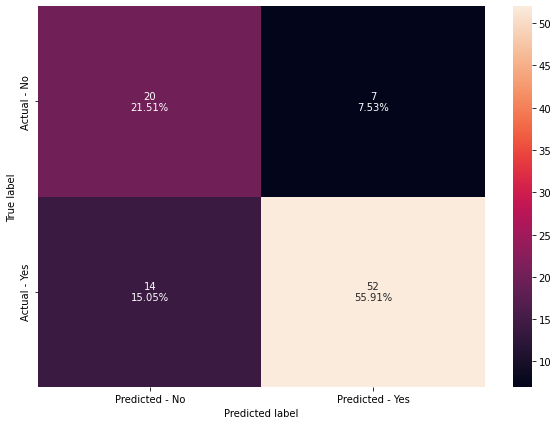

In [19]:
make_confusion_matrix(dTree,y_test)

In [20]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.7878787878787878


## Visualizing the Decision Tree

In [21]:
feature_names = list(X.columns)
print(feature_names)

['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope']


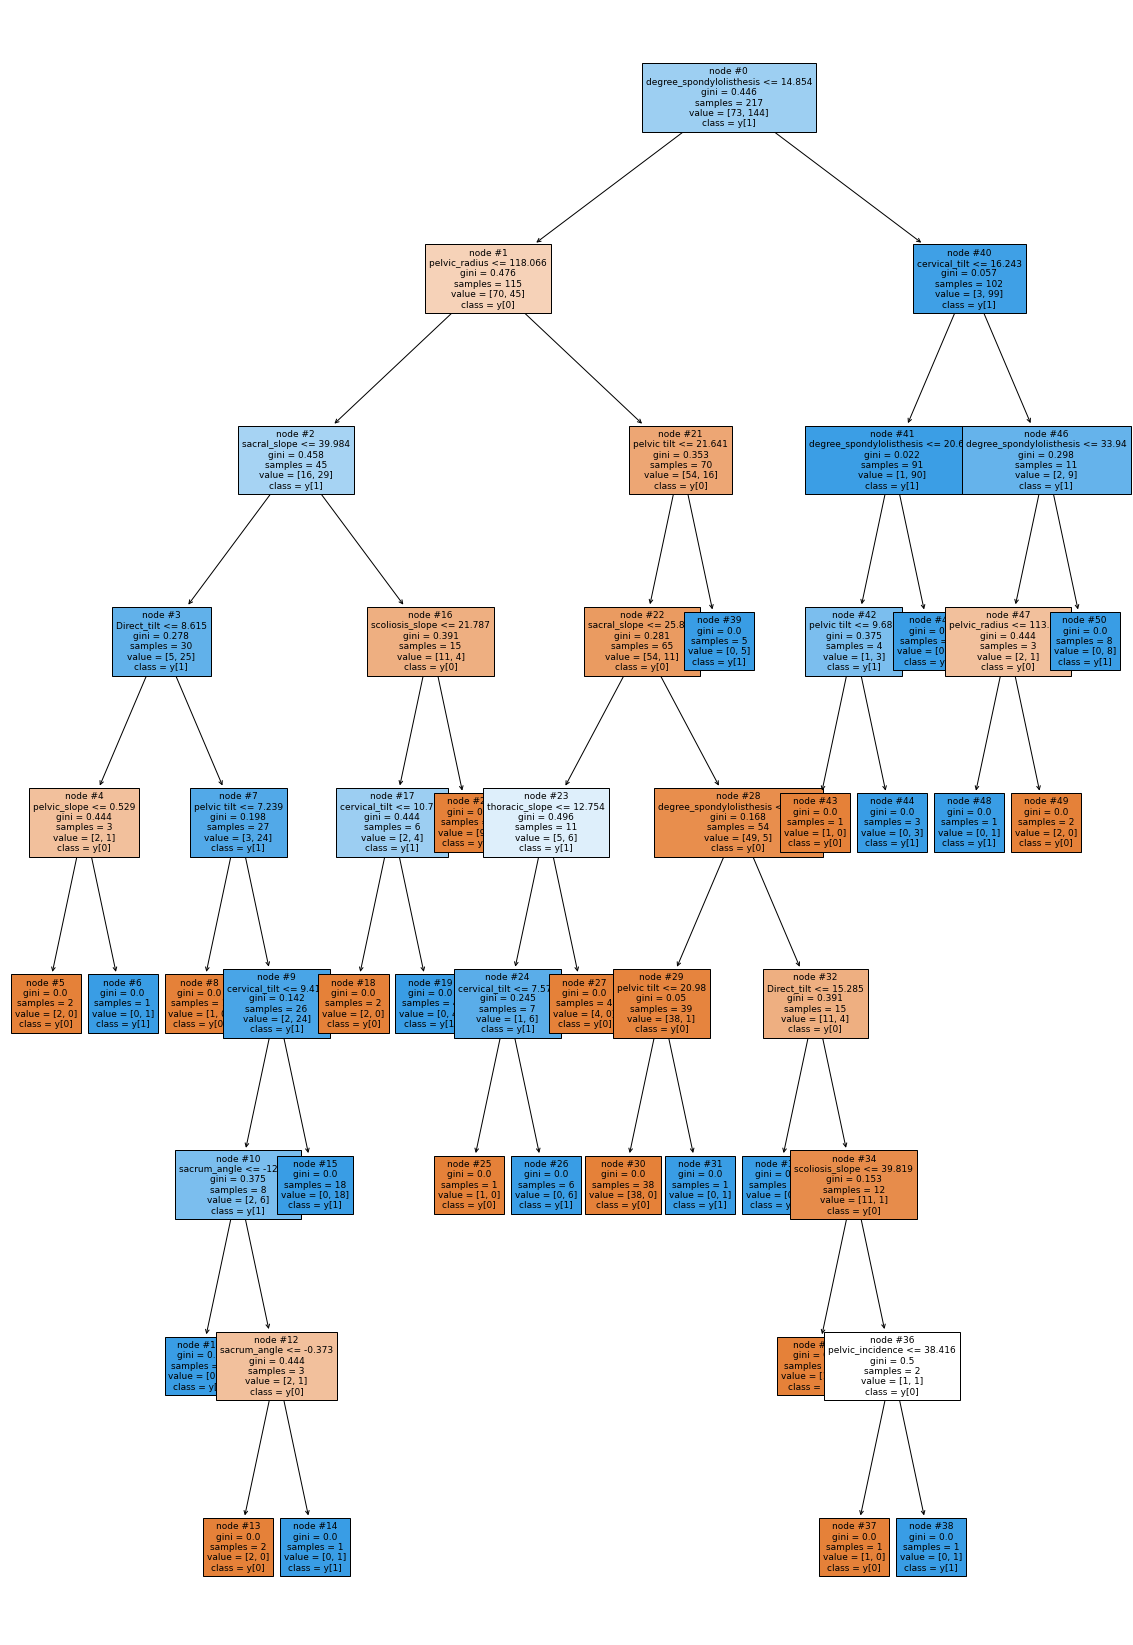

In [22]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [23]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- degree_spondylolisthesis <= 14.85
|   |--- pelvic_radius <= 118.07
|   |   |--- sacral_slope <= 39.98
|   |   |   |--- Direct_tilt <= 8.62
|   |   |   |   |--- pelvic_slope <= 0.53
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |--- pelvic_slope >  0.53
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- Direct_tilt >  8.62
|   |   |   |   |--- pelvic tilt <= 7.24
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |--- pelvic tilt >  7.24
|   |   |   |   |   |--- cervical_tilt <= 9.42
|   |   |   |   |   |   |--- sacrum_angle <= -12.82
|   |   |   |   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |   |   |   |   |--- sacrum_angle >  -12.82
|   |   |   |   |   |   |   |--- sacrum_angle <= -0.37
|   |   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- sacrum_angle >  -0.37
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |---

In [24]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
degree_spondylolisthesis  0.412395
pelvic tilt               0.118683
pelvic_radius             0.111555
sacral_slope              0.104975
Direct_tilt               0.058833
cervical_tilt             0.058276
scoliosis_slope           0.041630
thoracic_slope            0.038605
sacrum_angle              0.030965
pelvic_slope              0.013762
pelvic_incidence          0.010322
lumbar_lordosis_angle     0.000000


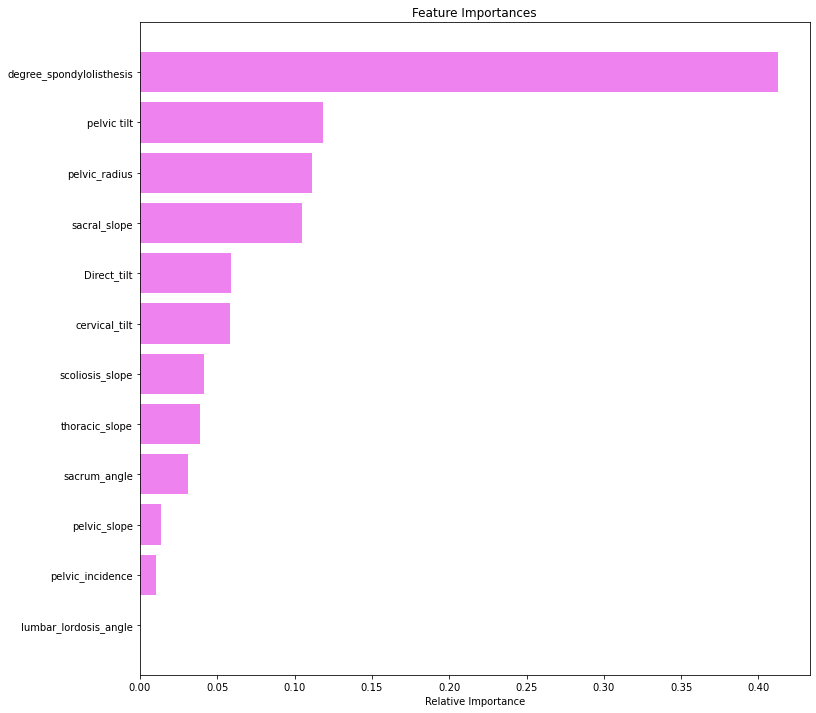

In [25]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

According to the decision tree model, degree spondylolisthesis is the most important variable for predicting the customer default.

### Reducing over fitting
- In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits   and it captures more information about the data and this is one of the root causes of overfitting
- Let's try Limiting the max_depth of tree to 3

In [26]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

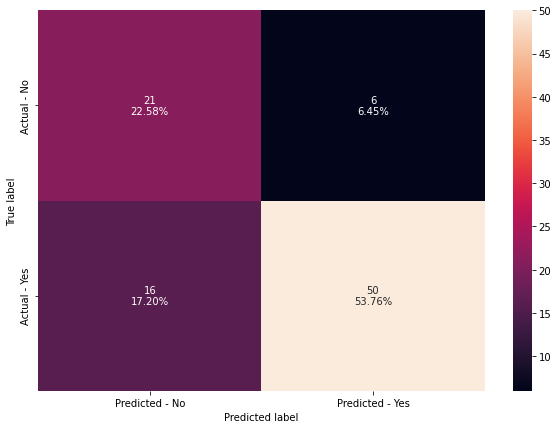

In [27]:
make_confusion_matrix(dTree1, y_test)

In [28]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.8986175115207373
Accuracy on test set :  0.7634408602150538
Recall on training set :  0.8888888888888888
Recall on test set :  0.7575757575757576


## Visualizing the Decision Tree

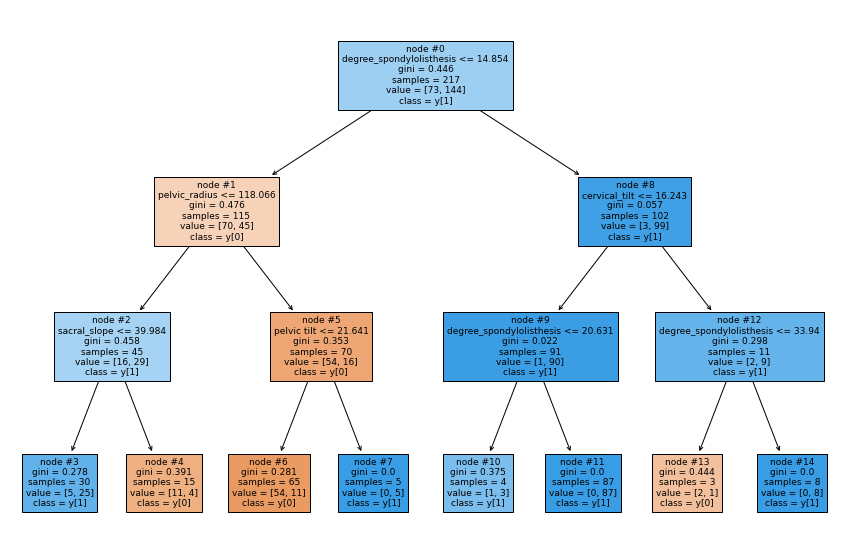

In [29]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [30]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

|--- degree_spondylolisthesis <= 14.85
|   |--- pelvic_radius <= 118.07
|   |   |--- sacral_slope <= 39.98
|   |   |   |--- weights: [5.00, 25.00] class: 1
|   |   |--- sacral_slope >  39.98
|   |   |   |--- weights: [11.00, 4.00] class: 0
|   |--- pelvic_radius >  118.07
|   |   |--- pelvic tilt <= 21.64
|   |   |   |--- weights: [54.00, 11.00] class: 0
|   |   |--- pelvic tilt >  21.64
|   |   |   |--- weights: [0.00, 5.00] class: 1
|--- degree_spondylolisthesis >  14.85
|   |--- cervical_tilt <= 16.24
|   |   |--- degree_spondylolisthesis <= 20.63
|   |   |   |--- weights: [1.00, 3.00] class: 1
|   |   |--- degree_spondylolisthesis >  20.63
|   |   |   |--- weights: [0.00, 87.00] class: 1
|   |--- cervical_tilt >  16.24
|   |   |--- degree_spondylolisthesis <= 33.94
|   |   |   |--- weights: [2.00, 1.00] class: 0
|   |   |--- degree_spondylolisthesis >  33.94
|   |   |   |--- weights: [0.00, 8.00] class: 1



In [31]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
degree_spondylolisthesis  0.628443
pelvic_radius             0.153873
sacral_slope              0.104300
pelvic tilt               0.104082
cervical_tilt             0.009302
pelvic_incidence          0.000000
lumbar_lordosis_angle     0.000000
pelvic_slope              0.000000
Direct_tilt               0.000000
thoracic_slope            0.000000
sacrum_angle              0.000000
scoliosis_slope           0.000000


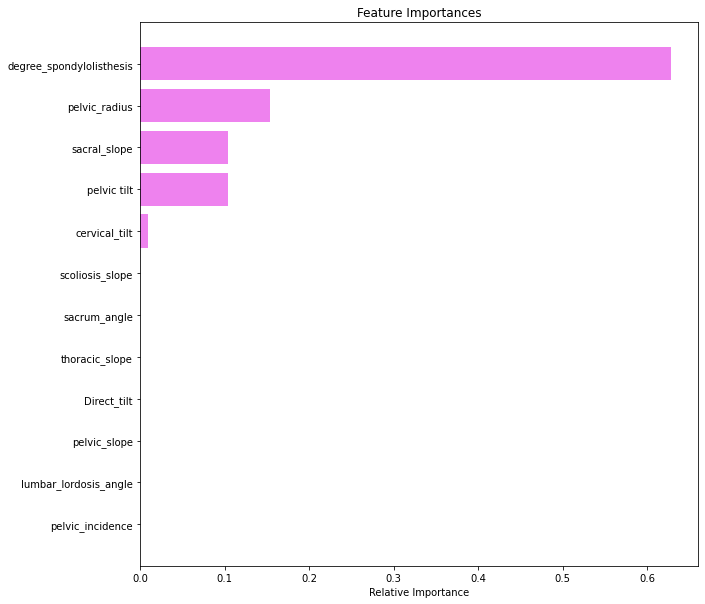

In [32]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=5,
                       random_state=1)

## Confusion Matrix - decision tree with tuned hyperparameters

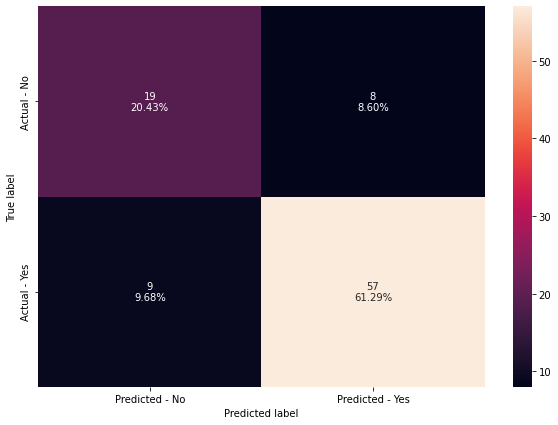

In [35]:
make_confusion_matrix(estimator,y_test)

In [36]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.9078341013824884
Accuracy on test set :  0.8172043010752689
Recall on training set :  0.9444444444444444
Recall on test set :  0.8636363636363636


* recall has improved on both accuracy and recall

## Visualizing the Decision Tree

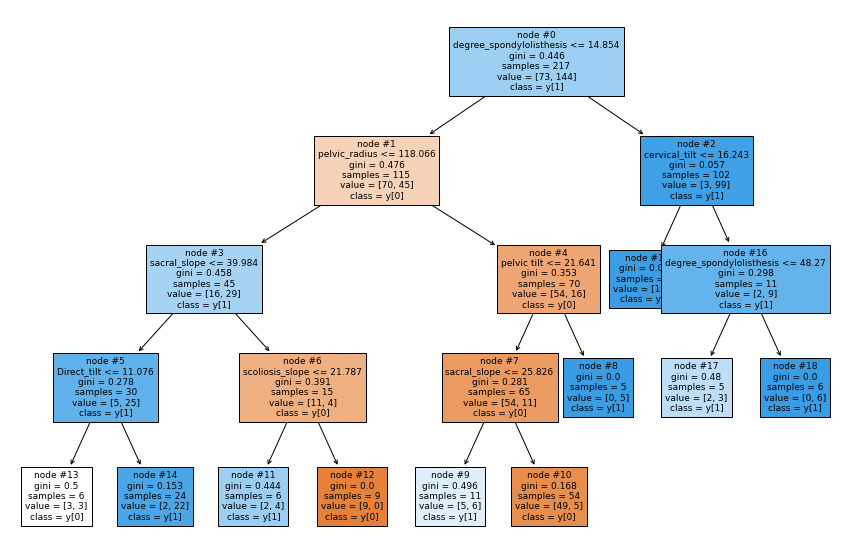

In [37]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [38]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- degree_spondylolisthesis <= 14.85
|   |--- pelvic_radius <= 118.07
|   |   |--- sacral_slope <= 39.98
|   |   |   |--- Direct_tilt <= 11.08
|   |   |   |   |--- weights: [3.00, 3.00] class: 0
|   |   |   |--- Direct_tilt >  11.08
|   |   |   |   |--- weights: [2.00, 22.00] class: 1
|   |   |--- sacral_slope >  39.98
|   |   |   |--- scoliosis_slope <= 21.79
|   |   |   |   |--- weights: [2.00, 4.00] class: 1
|   |   |   |--- scoliosis_slope >  21.79
|   |   |   |   |--- weights: [9.00, 0.00] class: 0
|   |--- pelvic_radius >  118.07
|   |   |--- pelvic tilt <= 21.64
|   |   |   |--- sacral_slope <= 25.83
|   |   |   |   |--- weights: [5.00, 6.00] class: 1
|   |   |   |--- sacral_slope >  25.83
|   |   |   |   |--- weights: [49.00, 5.00] class: 0
|   |   |--- pelvic tilt >  21.64
|   |   |   |--- weights: [0.00, 5.00] class: 1
|--- degree_spondylolisthesis >  14.85
|   |--- cervical_tilt <= 16.24
|   |   |--- weights: [1.00, 90.00] class: 1
|   |--- cervical_tilt >  16.24
|   |   |

In [39]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                               Imp
degree_spondylolisthesis  0.541212
sacral_slope              0.148162
pelvic_radius             0.138025
pelvic tilt               0.093362
scoliosis_slope           0.046617
Direct_tilt               0.024280
cervical_tilt             0.008344
pelvic_incidence          0.000000
lumbar_lordosis_angle     0.000000
pelvic_slope              0.000000
thoracic_slope            0.000000
sacrum_angle              0.000000


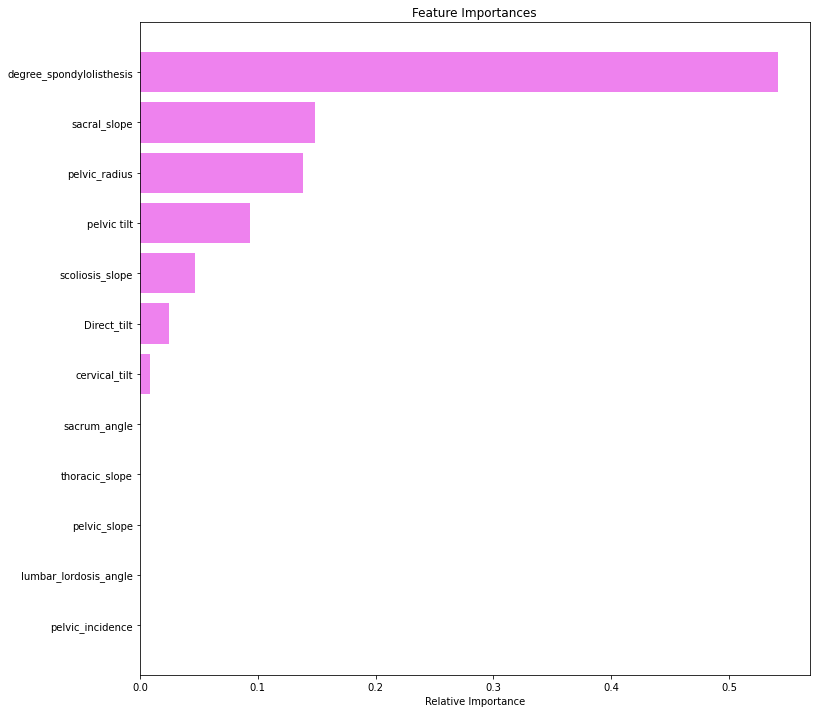

In [40]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Cost Complexity Pruning


The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [41]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [42]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.004224,0.008449
2,0.004558,0.017564
3,0.005672,0.034579
4,0.005907,0.052300
5,0.006144,0.058445
6,0.007562,0.066007
7,0.007680,0.073688
8,0.007900,0.081587
9,0.008980,0.090568


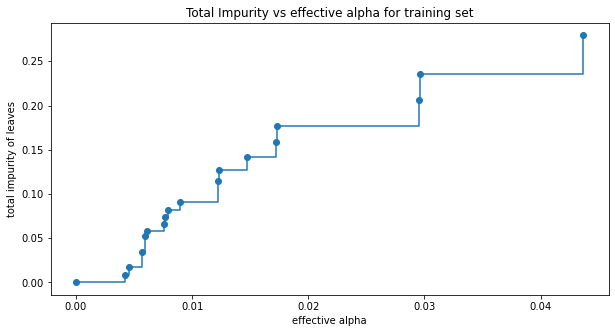

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [44]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.16718273972032832


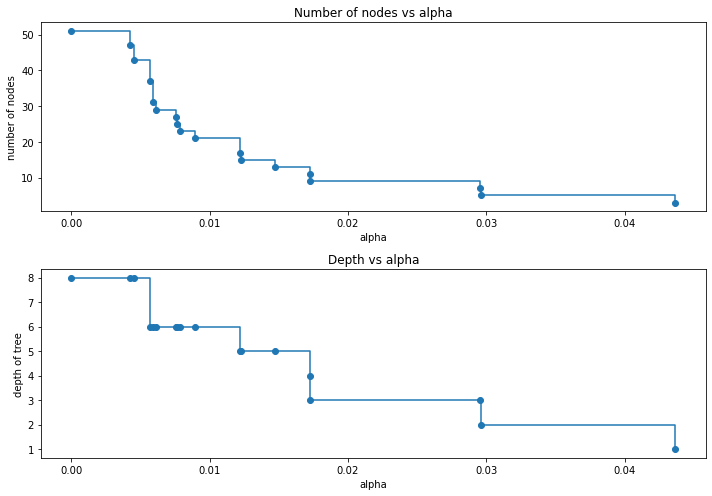

In [45]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Accuracy vs alpha for training and testing sets
----------------------------------------------------
When ``ccp_alpha`` is set to zero and keeping the other default parameters
of `DecisionTreeClassifier`, the tree overfits, leading to
a 100% training accuracy and 69% testing accuracy. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.

In [46]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

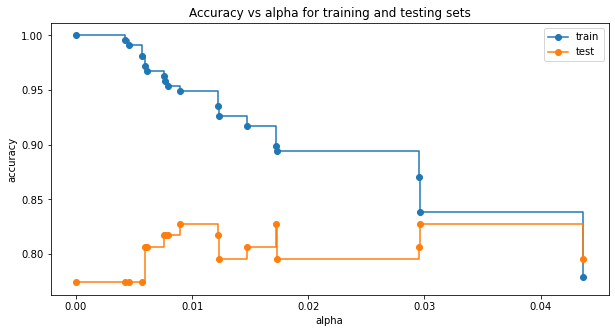

In [47]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [48]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.008980267044783167, random_state=1)
Training accuracy of best model:  0.9493087557603687
Test accuracy of best model:  0.8279569892473119


In [49]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [50]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

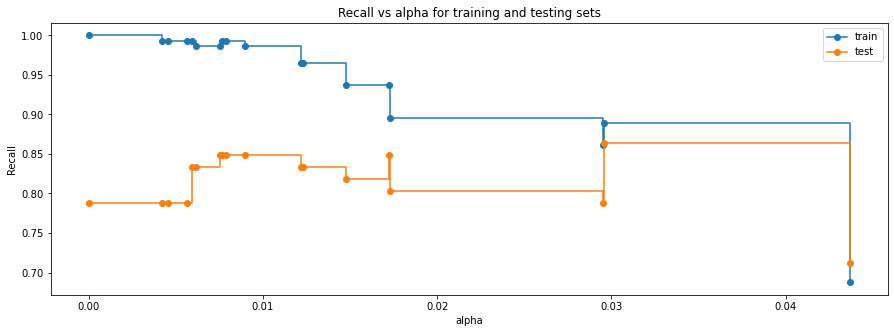

In [51]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [52]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.029595494111623127, random_state=1)


## Confusion Matrix - post-pruned decision tree

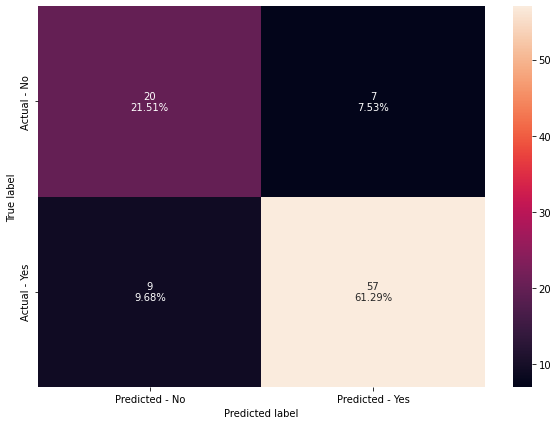

In [53]:
make_confusion_matrix(best_model,y_test)

In [54]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  0.8888888888888888
Recall on test set :  0.8636363636363636


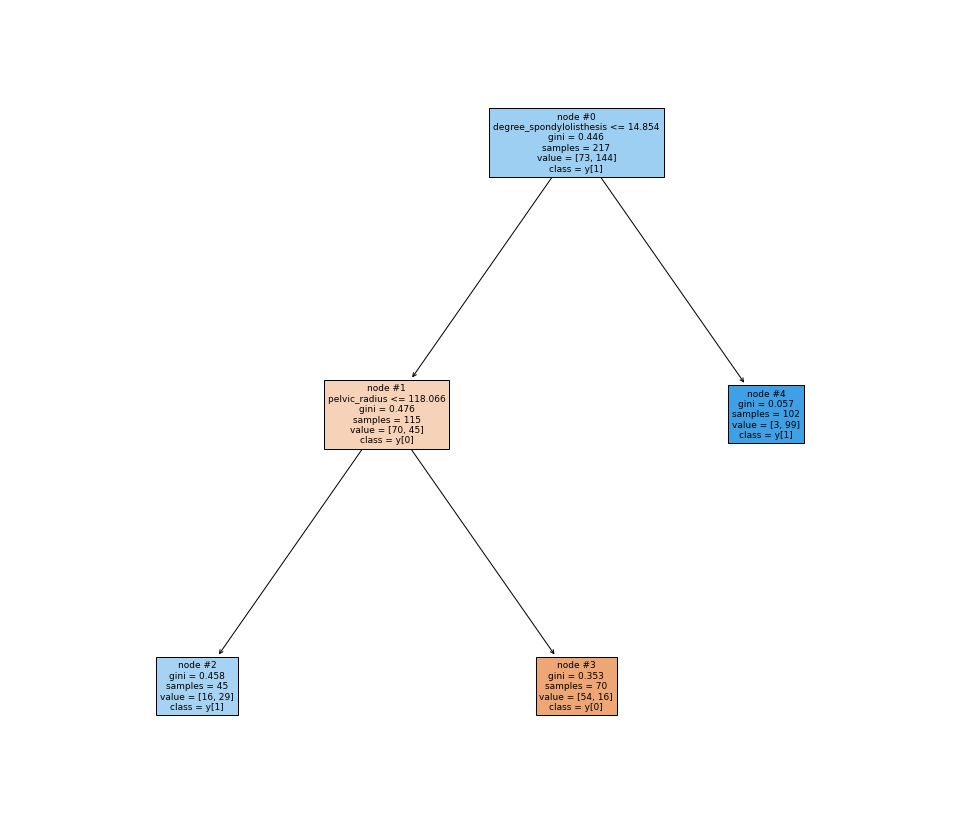

In [55]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [56]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- degree_spondylolisthesis <= 14.85
|   |--- pelvic_radius <= 118.07
|   |   |--- weights: [16.00, 29.00] class: 1
|   |--- pelvic_radius >  118.07
|   |   |--- weights: [54.00, 16.00] class: 0
|--- degree_spondylolisthesis >  14.85
|   |--- weights: [3.00, 99.00] class: 1



In [57]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
degree_spondylolisthesis  0.792918
pelvic_radius             0.207082
pelvic_incidence          0.000000
pelvic tilt               0.000000
lumbar_lordosis_angle     0.000000
sacral_slope              0.000000
pelvic_slope              0.000000
Direct_tilt               0.000000
thoracic_slope            0.000000
cervical_tilt             0.000000
sacrum_angle              0.000000
scoliosis_slope           0.000000


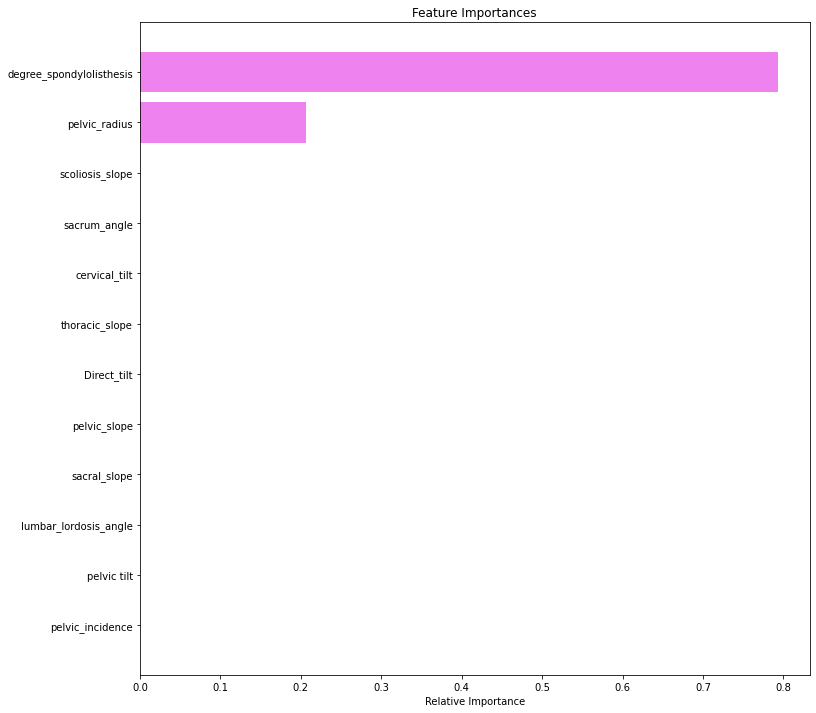

In [58]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Comparing all the decision tree models

In [60]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[1,0.88,0.94,0.88], 'Test_Recall':[0.78,0.75,0.86,0.86]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00,0.78
1,Decision tree with restricted maximum depth,0.88,0.75
2,Decision treee with hyperparameter tuning,0.94,0.86
3,Decision tree with post-pruning,0.88,0.86
